# Visualisations

- [Notebook Preparations](#notebook-preparations)

- [Visualisations](#visualisations)
    - Man-Kendall Test Results
        - Month
        - Month & Elevation
        - Country

## Notebook Preparations

In [1]:
# Import Packages

import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from pathlib import Path
import sys


In [2]:
# Directories

NB_DIR = Path.cwd()                 # Notebook Directory
REPO_ROOT = NB_DIR.parent           # Main Repo Directory
sys.path.insert(0, str(REPO_ROOT))  # Assign REPO ROOT as Directory 0 for Import searches

# Files

# Macro-perspective Trends
avg_country = pd.read_csv(REPO_ROOT / 'Data/Cleaned/Tests/avg_country_trends.csv',index_col=False)                  # Average Snowpack Depth Trend Per Country
avg_country_month = pd.read_csv(REPO_ROOT / 'Data/Cleaned/Tests/avg_country_month_trends.csv',index_col=False)      # Average Snowpack Depth Trend Per Country Month
avg_month = pd.read_csv(REPO_ROOT / 'Data/Cleaned/Tests/avg_month_trends.csv',index_col=False)                      # Average Snowpack Depth Trend per Month
avg_elevation_month = pd.read_csv(REPO_ROOT / 'Data/Cleaned/Tests/avg_elevation_month_trends.csv',index_col=False)  # Average Snowpack Depth Trend Per Elevation Bad Mong

# Micro-persective Trends
typical_country = pd.read_csv(REPO_ROOT / 'Data/Cleaned/Tests/station-month-time-series-by-country.csv',index_col=False)                # Typical Snowpack Depth Trend of Weather Station Per Country 
typical_country_month = pd.read_csv(REPO_ROOT / 'Data/Cleaned/Tests/station-month-time-series-by-country-month.csv',index_col=False )    # Typical Snowpack Depth Trend of Weather Station Per Country Month
typical_station_month = pd.read_csv(REPO_ROOT / 'Data/Cleaned/Tests/station-month-time-series.csv',index_col=False)                     # Typical Snowpack Depth Trend of Weather Station Per Month
per_station = pd.read_csv(REPO_ROOT / 'Data/Cleaned/Tests/per_station_series.csv',index_col=False)                                      # Annual Snowpack Depth Trend per Weather Station



## Visualisations

Visualisations of Statistical Trends for Average Snowpack Depths

### Country Trends

In [3]:
from Scripts.figures import country_trends_fig
country_fig = country_trends_fig(per_station,avg_country)
country_fig

#### Interpretation

Countries Italy, Slovenia, and Austria exhibit statistically significant decreases in country-level mean snowpack depth, with Sen slopes of roughly −2 to −4 cm per decade. Germany and Switzerland show negative but non-significant trends (about −1 cm/decade), meaning the decreases are not distinguishable from zero at 𝛼 = 0.05. France shows a non-significant slight increase. Results are from Mann–Kendall (Hamed–Rao) tests applied to country-year average snowpack series; slopes are reported in cm per decade.

### Month Trends

In [4]:
from Scripts.figures import month_trends_fig
month_fig = month_trends_fig(typical_station_month,avg_month)
month_fig

#### Interpretation

Months April and May exhibit statistically significant decreases in European-Alps mean snowpack depth, with Sen slopes of roughly  -1.60 and -1.10 cm per decade respectively. All other winter months, February, December, January, November and March show negative but non-significant trends, with Sen Slopes of roughly -0.55 to -1.90 cm per decade.  These decreases ccannot be distinguished from zero trend due to insufficient evidence (α=0.05).

Further analysis can investiage changes in weather patterns of Springs months (April, May) to link correlation of decreasing Sen slopes of mean snowpack depths.



#### Average Country Month Trend

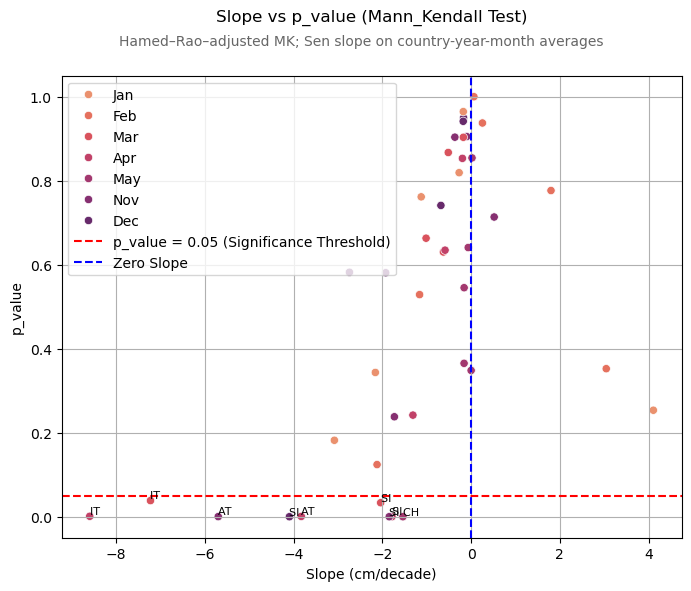

In [5]:

fig, ax = plt.subplots(figsize=(8,6))


sns.scatterplot(data=avg_country_month, x='slope_per_decade',y='p',hue='month_name',palette='flare',legend=True )

plt.axhline(0.05,linestyle='--',color='red',label='p_value = 0.05 (Significance Threshold)')
plt.axvline(0.00,linestyle='--',color='blue',label='Zero Slope')

# # Annotate each point with the month name
# for i, row in avg_country_month.iterrows():

#       ax.text(
#         row['slope_per_decade'] + 0.02,  # x position slightly offset
#         row['p'] + 0.005,                # y position slightly offset
#         row['month_name'],
#         fontsize=9
#     )


ax.legend()
ax.set_ylabel('p_value')
ax.set_xlabel('Slope (cm/decade)')
ax.set_title('Slope vs p_value (Mann_Kendall Test)',y=1.1)
ax.grid(True)


fig.suptitle('Hamed–Rao–adjusted MK; Sen slope on country-year-month averages',
             y=0.95, fontsize=10, color='0.4')


df = avg_country_month.copy()   # your dataframe used to plot
for _, r in df[df['p'] < 0.05].iterrows():
    ax.text(r['slope_per_decade'], r['p'],
            f"{r['country_abr']} ",
            fontsize=8, ha='left', va='bottom')

plt.show()

In [6]:
by_month = (df.groupby('month')
            .agg(n=('is_sig','size'),
                 n_sig=('is_sig','sum'),
                 pct_sig=('is_sig', lambda s: 100*s.mean()),
                 median_slope_decade=('slope_per_decade','median'))
            .reset_index()
            .sort_values('pct_sig', ascending=False))
by_month

KeyError: "Column(s) ['is_sig'] do not exist"

##### Interpretation

Country-months that exhibit statistically significant decreases in mean snowpack depth are all amongst fringe winter months; November, December, March, April, May. 

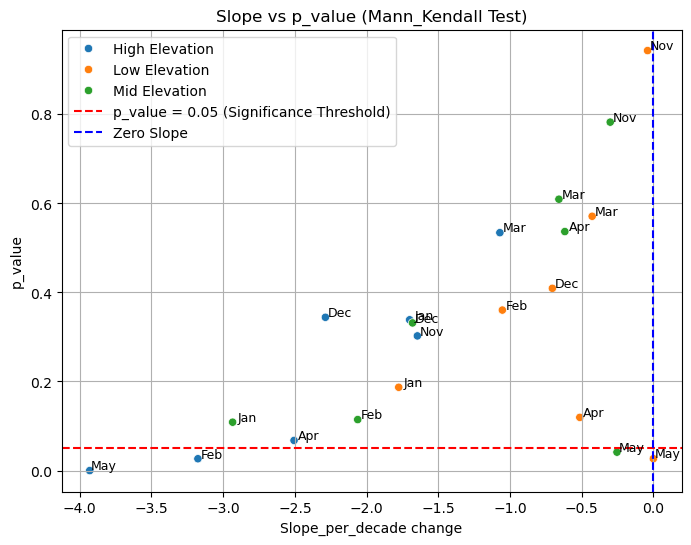

In [ ]:
avg_elevation_month['month_name'] = avg_elevation_month['month'].apply(get_month_name)


fig2, ax2 = plt.subplots(figsize=(8,6))



sns.scatterplot(data=avg_elevation_month, x='slope_per_decade',y='p',hue='elevation_band', ax=ax2 )

plt.axhline(0.05,linestyle='--',color='red',label='p_value = 0.05 (Significance Threshold)')
plt.axvline(0.00,linestyle='--',color='blue',label='Zero Slope')

for i, row in avg_elevation_month.iterrows():
    ax2.text(
        row['slope_per_decade'] +0.1 ,
        row['p'] + 0.01,
        row['month_name'],        # Display month
        fontsize=9,
        ha='center',
        va='center',
        color='black',
        fontweight='normal'
    )


ax2.legend()
ax2.set_ylabel('p_value')
ax2.set_xlabel('Slope_per_decade change')
ax2.set_title('Slope vs p_value (Mann_Kendall Test)')
ax2.grid(True)

plt.show()

In [ ]:
typical_country

,country,n_station_month_series,n_stations,median_years,percent_sig_station_month_series,median_station_slope_cm_per_year,median_station_slope_cm_per_decade,mean_station_slope_cm_per_year,mean_station_slope_cm_per_decade
0,Austria,2195,321,46.0,17.494305,-0.035714,-0.357143,-0.117927,-1.179269
1,France,300,46,50.0,10.000000,-0.133019,-1.330189,-0.174912,-1.749122
2,Germany,1103,159,53.0,14.868540,-0.026316,-0.263158,-0.107828,-1.078278
3,Italy,249,53,35.0,11.646586,0.000000,0.000000,-0.022740,-0.227403
4,Slovenia,366,53,56.0,33.333333,-0.087605,-0.876050,-0.144193,-1.441927
5,Switzerland,1096,163,59.0,12.956204,-0.040221,-0.402206,-0.126877,-1.268768


In [ ]:
typical_country_month.head(1)

,country,month,num_stations,median_years,percent_sig,median_slope_theil_per_year,median_slope_theil_per_decade,mean_slope_theil_per_year,mean_slope_theil_per_decade,country_abr
0,Austria,1,321,46.0,5.607477,-0.125,-1.25,-0.133281,-1.332814,AT


In [ ]:
avg_country_month.head(1)

,country,month,n_years,median_stations_per_year,trend,p,tau,slope_per_year,slope_per_decade,variant,month_name,country_abr
0,Austria,1,46,362,no trend,0.761626,-0.041546,-0.112497,-1.124971,hamed_rao,Jan,AT


In [ ]:
typical_country.head(1)

,country,n_station_month_series,n_stations,median_years,percent_sig_station_month_series,median_station_slope_cm_per_year,median_station_slope_cm_per_decade,mean_station_slope_cm_per_year,mean_station_slope_cm_per_decade,country_abr
0,Austria,2195,321,46.0,17.494305,-0.035714,-0.357143,-0.117927,-1.179269,AT


In [ ]:
avg_elevation_month.head(1)

,month,elevation_band,n_years,median_stations_per_year,trend,p,tau,slope_per_year,slope_per_decade,variant,month_name
0,1,High Elevation,84,145,no trend,0.338525,-0.05852,-0.169975,-1.699746,hamed_rao,Jan


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Month order
order = ['Jan','Feb','Mar','Apr','May','Nov','Dec']

# Make month labels if needed
if 'month_name' not in typical_country_month.columns:
    month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',11:'Nov',12:'Dec'}
    typical_country_month = typical_country_month.assign(
        month_name = typical_country_month['month'].map(month_map)
    )
if 'month_name' not in avg_country_month.columns:
    month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',11:'Nov',12:'Dec'}
    avg_country_month = avg_country_month.assign(
        month_name = avg_country_month['month'].map(month_map)
    )

# Merge in significance from macro table
sig = avg_country_month.loc[:, ['country','month_name','p']].copy()
sig['sig'] = sig['p'] <= 0.05
H = typical_country_month.merge(sig, on=['country','month_name'], how='left')

fig = px.imshow(
    H.pivot_table(index='country', columns='month_name',
                  values='median_slope_theil_per_decade'),
    color_continuous_scale='RdBu_r', origin='lower',
    labels=dict(color='Median station slope (cm/decade)')
)
fig.update_xaxes(categoryorder='array', categoryarray=order)

# Overlay significance dots
for r in H.itertuples():
    if r.sig:
        fig.add_trace(go.Scatter(
            x=[r.month_name], y=[r.country], mode='markers',
            marker=dict(color='black', size=6), showlegend=False,
            hoverinfo='skip'
        ))

fig.update_layout(
    title='Median station Theil–Sen slope by country × month (● = macro p ≤ 0.05)',
    coloraxis_colorbar=dict(title='cm/decade'),
    xaxis_title='', yaxis_title=''
)
fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

left = typical_country_month.rename(
    columns={'median_slope_theil_per_decade':'micro_slope'}
)[['country','month','micro_slope']]
right = avg_country_month.rename(
    columns={'slope_per_decade':'macro_slope'}
)[['country','month','p','macro_slope']]
dm = left.merge(right, on=['country','month'], how='inner')

# One subplot per month, or filter to one month at a time
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',11:'Nov',12:'Dec'}
dm['month_name'] = dm['month'].map(month_map)
dm = dm.sort_values(['month','country'])

fig = go.Figure()
for (m, g) in dm.groupby('month_name'):
    # dumbbell lines
    fig.add_trace(go.Scatter(
        x=g[['micro_slope','macro_slope']].to_numpy().T.flatten(),
        y=(g['country'].repeat(2)),
        mode='lines',
        line=dict(color='lightgray'),
        showlegend=False,
        hoverinfo='skip'
    ))
    # micro dots (median station)
    fig.add_trace(go.Scatter(
        x=g['micro_slope'], y=g['country'], mode='markers',
        name=f'{m} – micro (median station)',
        marker=dict(symbol='circle', size=8),
        hovertemplate=("<b>%{y}</b> — "+m+
                       "<br>Median station slope: %{x:.2f} cm/decade<extra></extra>")
    ))
    # macro dots (aggregated series), outline if significant
    fig.add_trace(go.Scatter(
        x=g['macro_slope'], y=g['country'], mode='markers',
        name=f'{m} – macro (aggregated)',
        marker=dict(symbol='diamond', size=10,
                    line=dict(width=(g['p']<=0.05).map({True:2, False:0}), color='black')),
        hovertemplate=("<b>%{y}</b> — "+m+
                       "<br>Macro slope: %{x:.2f} cm/decade"
                       "<br>p: %{customdata:.3f}<extra></extra>"),
        customdata=g['p']
    ))

fig.update_layout(
    title='Micro vs. Macro slopes per country–month (diamond outline = p ≤ 0.05)',
    xaxis_title='Slope (cm/decade)', yaxis_title='Country', height=600
)
fig.add_vline(x=0, line_dash='dash', line_color='blue')
fig.show()


In [ ]:
import plotly.express as px

# One row per station-month with columns: country, slope_sen_per_decade, p
station = typical_station_month  # if present

fig = px.violin(station, x='country', y='slope_sen_per_decade', color='country',
                box=True, points='all', hover_data=['p'], height=500)
fig.add_hline(y=0, line_dash='dash', line_color='blue')

# Overlay macro country slopes as diamonds
over = avg_country_month.groupby('country', as_index=False).agg(
    macro_slope=('slope_per_decade','median')  # or mean; up to you
)
fig.add_trace(go.Scatter(
    x=over['country'], y=over['macro_slope'], mode='markers',
    marker=dict(symbol='diamond', size=12, color='black'),
    name='Macro (median across months)'
))

fig.update_layout(title='Distribution of station slopes by country',
                  yaxis_title='Slope (cm/decade)', xaxis_title='')
fig.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

if 'month_name' not in avg_elevation_month.columns:
    month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',11:'Nov',12:'Dec'}
    avg_elevation_month = avg_elevation_month.assign(
        month_name = avg_elevation_month['month'].map(month_map)
    )

pivot = avg_elevation_month.pivot_table(
    index='elevation_band', columns='month_name', values='slope_per_decade'
).reindex(columns=['Nov','Dec','Jan','Feb','Mar','Apr','May'], fill_value=None)

fig = px.imshow(pivot, color_continuous_scale='RdBu_r', origin='lower',
                labels=dict(color='Slope (cm/decade)'),
                title='Macro Theil–Sen slope by elevation band × month')

# Add ● where p ≤ 0.05
for r in avg_elevation_month.itertuples():
    if r.p <= 0.05:
        fig.add_trace(go.Scatter(
            x=[r.month_name], y=[r.elevation_band], mode='markers',
            marker=dict(color='black', size=6), showlegend=False, hoverinfo='skip'
        ))

fig.update_coloraxes(colorbar_title='cm/decade')
fig.show()


In [ ]:
import plotly.express as px
cov = avg_country_month.copy()
cov['month_name'] = cov['month_name'].astype('category')
fig = px.line(cov, x='month_name', y='median_stations_per_year', color='country',
              markers=True, title='Coverage: median stations per year (by month)')
fig.update_xaxes(categoryorder='array', categoryarray=order)
fig.update_yaxes(title='stations / year')
fig.show()
